## Part 3: Model Evaluation and Comparison

In Part 3, we used predictive modeling aspect of our churn prediction project and to evaluate various machine learning models to determine which performs best at predicting customer churn based on the dataset provided.

The dataset we used was Churn_Modelling.csv

We used LabelEncoder to numerically transform the Geography and Gender columns, converting categorical information into a format understandable by our models. Columns like RowNumber, CustomerId, and Surname were removed since they contributed no predictive value to the churn outcome. To standardize the range of our continuous input features, we employed StandardScaler. This step is particularly beneficial for distance-based models and can significantly impact their performance.

Machine Learning Models:
Naïve Bayes (GaussianNB),
K-Nearest Neighbors (KNN),
Support Vector Machine (SVM),
Decision Tree, and 
Logistic Regression.
Each model was trained on the preprocessed training dataset and evaluated on a separate testing dataset to gauge its predictive accuracy.

When we created the model For KNN, the K value for K (neighbors) and that gave us the highest accuracy was 20.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('../given_data/Churn_Modelling.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Dropping irrelevant features
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)



In [56]:
# Checking for dupes
print('Number of instances = %d' % (df.shape[0]))
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of instances = 10000
Number of duplicate rows = 0


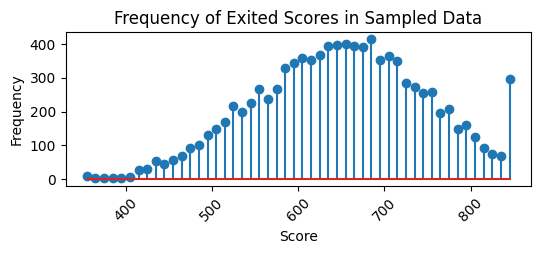

In [57]:
# Plotting the histogram
# Obtain the counts and the corresponding values
counts, bin_edges = np.histogram(df['CreditScore'], bins=50)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(6, 2))
plt.stem(bin_centers, counts)
plt.title('Frequency of Exited Scores in Sampled Data')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# # 10% was too small
# # Sample size of 33%
# sampleSz = int(0.33 * len(df))

# # Perform simple random sampling
# sampDf = df.sample(n=sampleSz, random_state=1)
# # Plotting the histogram for the sampled data
# counts, bin_edges = np.histogram(sampDf['CreditScore'], bins=50)
# bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])


# plt.figure(figsize=(6, 2))
# plt.stem(bin_centers, counts)
# plt.title('Frequency of Exited Scores in Sampled Data')
# plt.xlabel('Score')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)  # Rotates state labels for better visibility
# plt.show()

I noticed some of the visualization methods for assessing models was resource intensive for certain models, so I created a sample set for easier graphing. The a third of the set using SRS is pretty close to the original distribution.

In [58]:

# # Splitting the dataset
# X = sampDf.drop('Exited', axis=1)
# y = sampDf['Exited']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [59]:
# Splitting the dataset
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 0 1 1]


C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 0 1 0]


C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 0 0 0]


C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 0 0 0]


C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

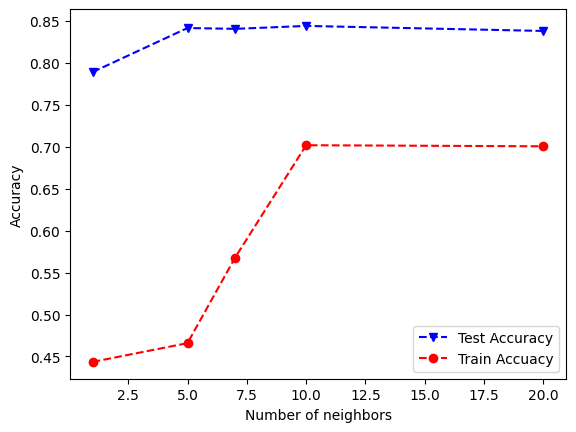

In [60]:
numNeighbors = [1, 5, 7, 10, 20]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Model appears to find

Keep in while adding graphs, graphs go above

In [ ]:
# Training and evaluating models
models = {
    'Naïve Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=20),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, predictions)

# Displaying accuracies
for model, acc in accuracies.items():
    print(f"{model}: {acc * 100:.2f}%")